In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

# Exploratory Data Analysis

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

768 rows and 9 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* The dataset shows that it has 768 rows in which none of them has null values.
* The data type are int and float which are numerical.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* Here min value of many columns is 0 which is not possible. The column pregnancies can have min value 0 but other is not possible so we have to replace those values with mean/median.
* Also max value of Insulin is 846 which is far greater thathe mean value(79.79) which should be an outlier.

# Data Cleaning

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null values

In [ ]:
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
402,5,136,84,41,88,35.0,0.286,35,1


In [ ]:
print((df['Glucose']==0).sum())
print((df['BloodPressure']==0).sum())
print((df['SkinThickness']==0).sum())
print((df['Insulin']==0).sum())
print((df['BMI']==0).sum())

5
35
227
374
11


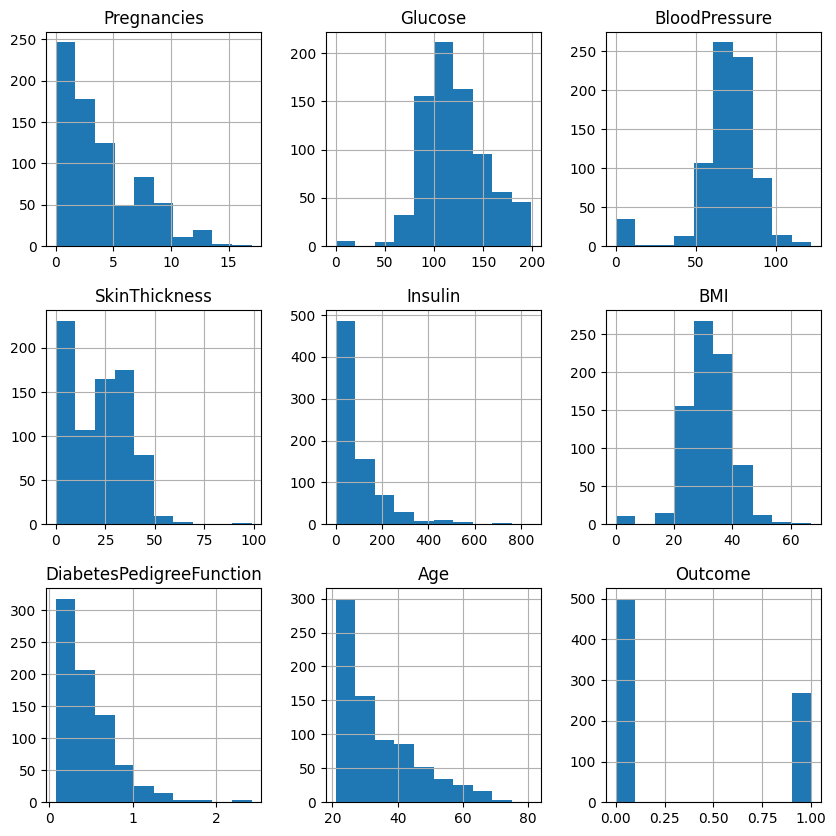

In [ ]:
df.hist(bins =10, figsize=(10, 10))
plt.show()

* Here, we can see that Glucose, BloodPressure and BMI has normal distribution and other don't.

So, we can replace the values for 0 by mean for these 3 columns and by median for others.

In [ ]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())


<Axes: xlabel='Outcome', ylabel='count'>

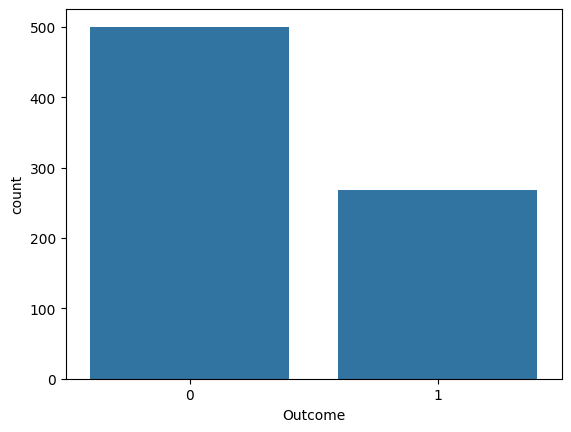

In [ ]:
sns.countplot(x="Outcome", data = df)

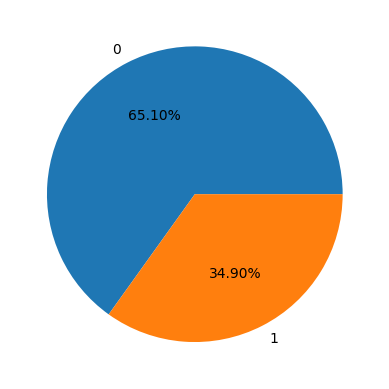

In [ ]:
o = df.Outcome.value_counts()
plt.pie(labels=o.index, x=o.values, autopct="%.2f%%")
plt.show()

The data is imbalanced.

The females that have diabetes are lesser in comparison as 34.90% of them has diabetes while remaining 65.10% do not have diabetes from database.

To check outliers

<Axes: xlabel='Outcome'>

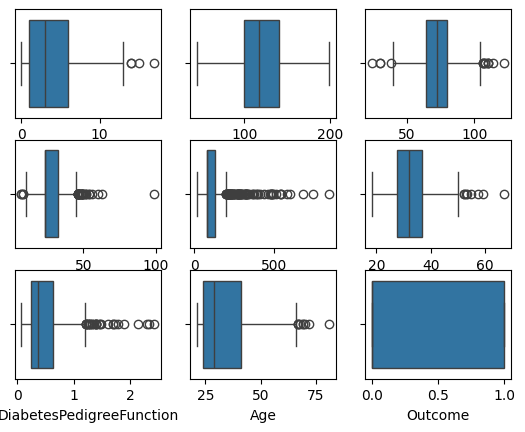

In [ ]:
plt.figsize=(12,12)
plt.subplot(3,3,1)
sns.boxplot(x='Pregnancies', data = df)
plt.subplot(3,3,2)
sns.boxplot(x='Glucose', data = df)
plt.subplot(3,3,3)
sns.boxplot(x='BloodPressure', data = df)
plt.subplot(3,3,4)
sns.boxplot(x='SkinThickness', data = df)
plt.subplot(3,3,5)
sns.boxplot(x='Insulin', data = df)
plt.subplot(3,3,6)
sns.boxplot(x='BMI', data = df)
plt.subplot(3,3,7)
sns.boxplot(x='DiabetesPedigreeFunction', data = df)
plt.subplot(3,3,8)
sns.boxplot(x='Age', data = df)
plt.subplot(3,3,9)
sns.boxplot(x='Outcome', data = df)


<Axes: >

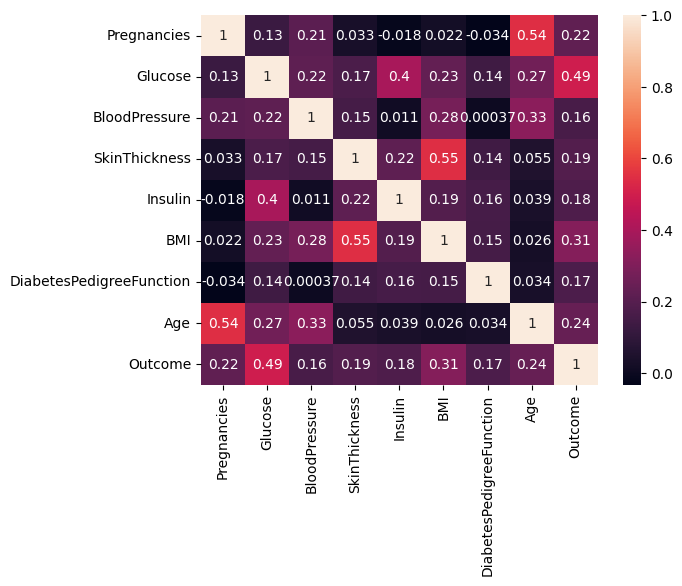

In [ ]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

* The correlation between Outcome and Glucose is 0.47, and between Outcome and BMI is 0.29 while between Outcome and Age is 0.24 which are those features which has high value of correlation with Outcome than other features.

* Also, BloodPressure, SkinThickness, Insulin and DiabetesPedigreeFunction has least correlation value with Outcome, so we can drop them.


<Axes: xlabel='Glucose', ylabel='Insulin'>

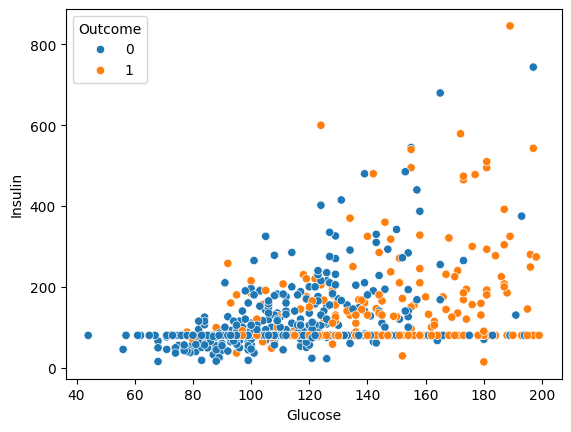

In [ ]:
sns.scatterplot(x="Glucose", y="Insulin", hue='Outcome', data = df)

<Axes: xlabel='Glucose', ylabel='Insulin'>

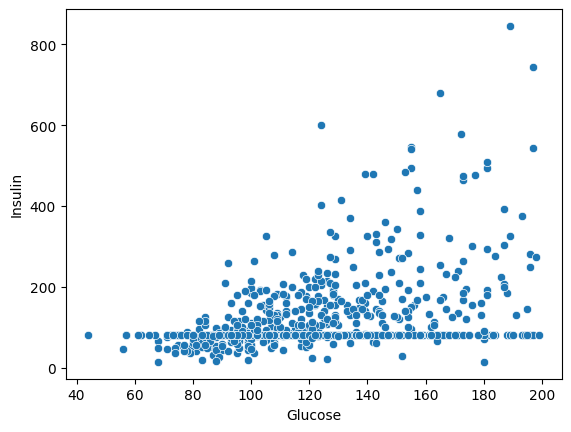

In [ ]:
sns.scatterplot(x="Glucose", y="Insulin", data = df)

In [ ]:
df.drop(['BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction'], axis = 1, inplace = True)

In [ ]:
df["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [ ]:
df.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148.0,33.6,50,1
1,1,85.0,26.6,31,0
2,8,183.0,23.3,32,1
3,1,89.0,28.1,21,0
4,0,137.0,43.1,33,1


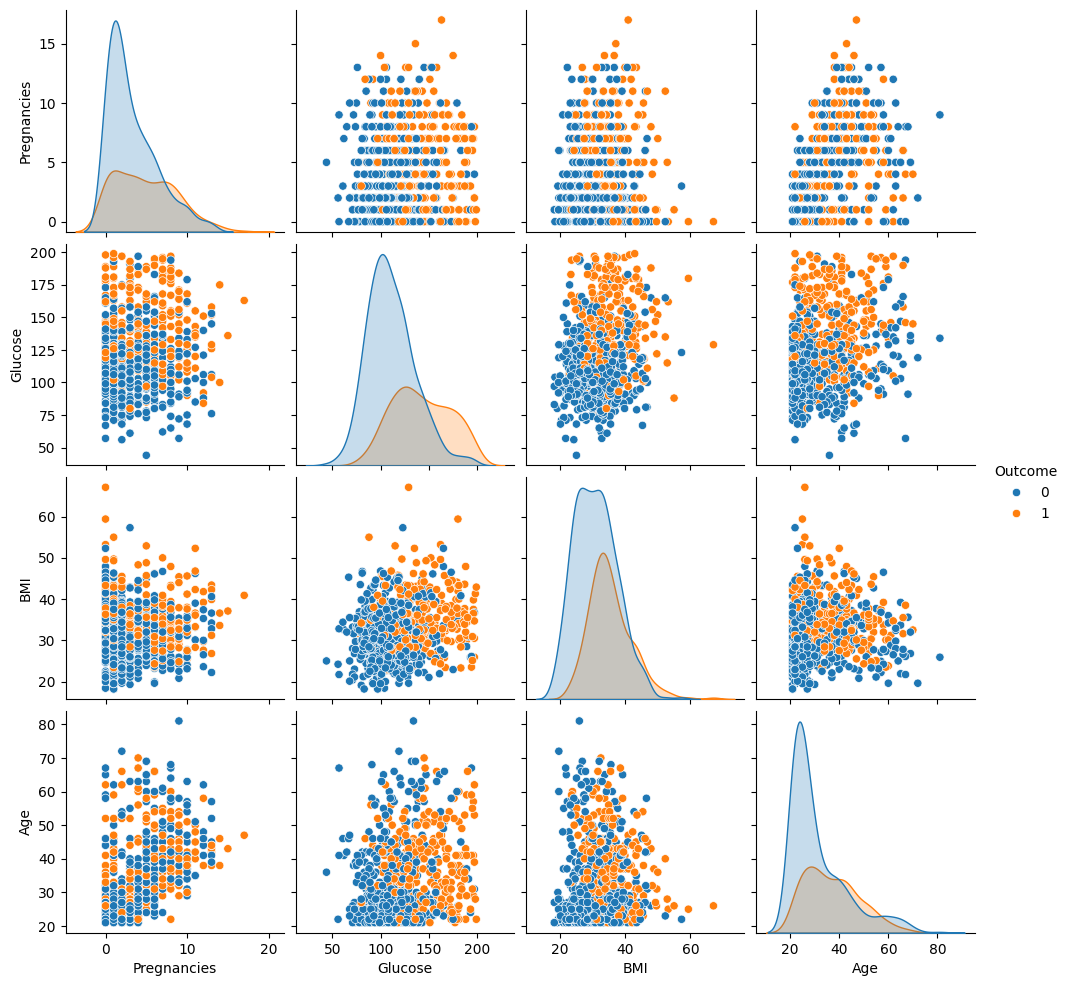

In [ ]:
sns.pairplot(df, hue='Outcome')

In [ ]:
X = df.iloc[:, :-1]
y = df.Outcome

In [ ]:
X.sample()

,Pregnancies,Glucose,BMI,Age
554,1,84.0,36.9,28


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score, classification_report

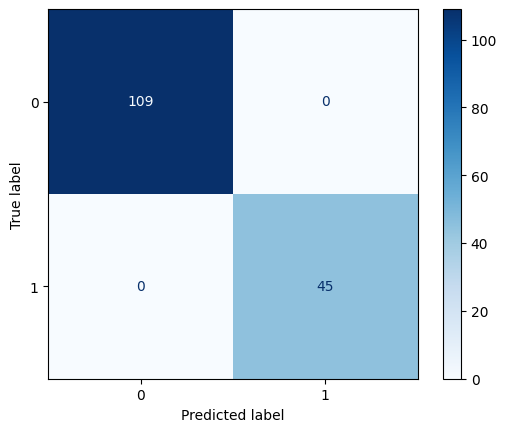

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_pred, cmap='Blues')

SInce the Outcome is imabalanced, accuracy_score is not used.

In [ ]:
f1_score(y_test, y_pred)

0.673076923076923

In [ ]:
recall_score(y_test, y_pred)

0.5932203389830508

In [ ]:
precision_score(y_test, y_pred)

0.7777777777777778

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        95
           1       0.78      0.59      0.67        59

    accuracy                           0.78       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

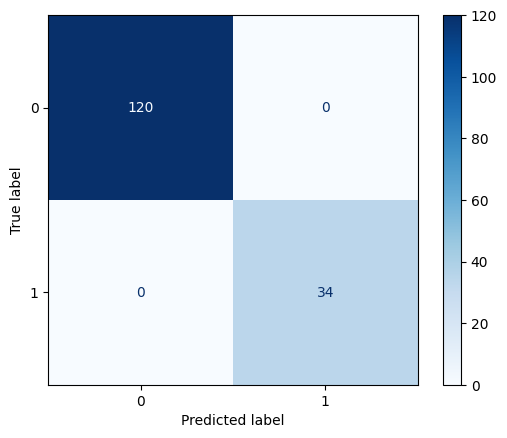

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_pred, cmap='Blues')

In [ ]:
recall_score(y_test, y_pred)

0.4915254237288136

In [ ]:
precision_score(y_test, y_pred)

0.8529411764705882

In [ ]:
f1_score(y_test, y_pred)

0.6236559139784946

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        95
           1       0.85      0.49      0.62        59

    accuracy                           0.77       154
   macro avg       0.80      0.72      0.73       154
weighted avg       0.79      0.77      0.76       154



For this dataset, if we have to choose a model between Logistic Regression and SVC, we choose Logistic Regression because the f1_score is higher than that of SVC. Also, the recall score is higher.

67.30% > 62.36% == f1 score

59.32% > 49.15% == recall score

We choose recall score because, in recall score the false negatives are minimized. Simply, in the diagnosis, there will be less ones where the model predicts the true instances false.